# Dataset Cleaning & Exploration
Erin Cameron  
COSC3117  
2022-11-14 
---



# 1.0) Set up

In [1]:
# !pip3 install seaborn

In [4]:
# Perform import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# Formatting settings for the environment
pd.set_option("display.max_columns", None)
np.set_printoptions(suppress=True)

# 2.0) Load & format data

Load data for each year of flight record & combine into a single file for downstream exploration and analysis. Each of the years between 2018 to 2022 contain upwards of 5 million flights (rows) each. Combining data of this size quickly becomes unmanageable (~30mil rows) & too large too work with in local memory. To overcome this, I will randomly subsample each year to a subset of 1 million flights. Furthermore, by making each dataset the same size, each year will carry equal weight (be represented equally) in downstream analyses & predictions.

** Nov 26 update: previously we were using 1mil flights per year, but that is too many entries/too big a file to compute on. Also we noticed that there is an imbalance between the number of cancelled and non-cancelled flights, to hep balance the classes, we will take ALL the cancelled flights in a given year and tehn subsample non-random flights to meet the total of 100k flights for each year. Excluding 2022 because data not available for whole year**

In [12]:
# define years I want to use data for
years = ["2018", "2019", "2020", "2021"]

In [13]:
# read in data, add to dictionary, and remove obj from memory
# if the file contains >100k flights, randomly subsample to 100k flights (rows)
data_dict = {}
for year in years:
    print("\n====> " + year)
    data = pd.read_csv("../data/Kaggle_Data/Combined_Flights_" + year + ".csv")    
    print("      Original dataset size...." + str(data.shape))
    if data.shape[0] > 100000:
        data = data.sample(n=100000)
        print("      Randomly subsampling to 100k flights...." + str(data.shape))
        print("      Number of cancelled flights...." + str(data["Cancelled"].value_counts()[True]))
        data_dict[year] = data
    del data


====> 2018
      Original dataset size....(5689512, 61)
      Randomly subsampling to 100k flights....(100000, 61)
      Number of cancelled flights....1540

====> 2019
      Original dataset size....(8091684, 61)
      Randomly subsampling to 100k flights....(100000, 61)
      Number of cancelled flights....1869

====> 2020
      Original dataset size....(5022397, 61)
      Randomly subsampling to 100k flights....(100000, 61)
      Number of cancelled flights....5916

====> 2021
      Original dataset size....(6311871, 61)
      Randomly subsampling to 100k flights....(100000, 61)
      Number of cancelled flights....1802


In [14]:
# Combine data across years into one data frame
merged = pd.concat(data_dict.values(), ignore_index = True)

In [15]:
# Check that the merge was sucessful
print("====> New, merged dataset size is...." + str(merged.shape))
display(merged.head(3))
display(merged.tail(3))

====> New, merged dataset size is....(400000, 61)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-10-06,Delta Air Lines Inc.,MSP,DCA,False,False,1255,1254.0,0.0,-1.0,1628.0,11.0,134.0,142.0,154.0,931.0,2018,4,10,6,6,DL,DL,19790,DL,1589,DL,19790,DL,N302DN,1589,13487,1348702,31650,"Minneapolis, MN",MN,27,Minnesota,63,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,0.0,-1.0,1200-1259,10.0,1304.0,1618.0,10.0,1617,11.0,0.0,0.0,1600-1659,4,0.0
1,2018-10-12,Republic Airlines,MSP,EWR,False,False,605,559.0,0.0,-6.0,940.0,0.0,126.0,160.0,161.0,1008.0,2018,4,10,12,5,UA,UA_CODESHARE,19977,UA,3520,YX,20452,YX,N653RW,3520,13487,1348702,31650,"Minneapolis, MN",MN,27,Minnesota,63,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,0.0,-1.0,0600-0659,29.0,628.0,934.0,6.0,945,-5.0,0.0,-1.0,0900-0959,5,0.0
2,2018-11-26,United Air Lines Inc.,LAX,DEN,False,False,1047,1046.0,0.0,-1.0,1420.0,13.0,128.0,140.0,154.0,862.0,2018,4,11,26,1,UA,UA,19977,UA,2049,UA,19977,UA,N78866,2049,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1000-1059,21.0,1107.0,1415.0,5.0,1407,13.0,0.0,0.0,1400-1459,4,0.0


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
399997,2021-06-24,Southwest Airlines Co.,RNO,PHX,False,False,1720,2042.0,202.0,202.0,2234.0,209.0,95.0,105.0,112.0,601.0,2021,2,6,24,4,WN,WN,19393,WN,1322,WN,19393,WN,N8659D,1322,14570,1457002,34570,"Reno, NV",NV,32,Nevada,85,14107,1410702,30466,"Phoenix, AZ",AZ,4,Arizona,81,1.0,12.0,1700-1759,11.0,2053.0,2228.0,6.0,1905,209.0,1.0,12.0,1900-1959,3,0.0
399998,2021-02-09,Mesa Airlines Inc.,IAH,DTW,False,False,1700,1705.0,5.0,5.0,2036.0,0.0,131.0,170.0,151.0,1075.0,2021,1,2,9,2,UA,UA_CODESHARE,19977,UA,6207,YV,20378,YV,N87302,6207,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,11433,1143302,31295,"Detroit, MI",MI,26,Michigan,43,0.0,0.0,1700-1759,12.0,1717.0,2028.0,8.0,2050,-14.0,0.0,-1.0,2000-2059,5,0.0
399999,2021-02-21,American Airlines Inc.,PHL,MIA,False,False,630,626.0,0.0,-4.0,923.0,4.0,131.0,169.0,177.0,1013.0,2021,1,2,21,7,AA,AA,19805,AA,610,AA,19805,AA,N818AL,610,14100,1410005,34100,"Philadelphia, PA",PA,42,Pennsylvania,23,13303,1330303,32467,"Miami, FL",FL,12,Florida,33,0.0,-1.0,0600-0659,32.0,658.0,909.0,14.0,919,4.0,0.0,0.0,0900-0959,5,0.0


In [16]:
# Save the merged file
filename = "FlightStatusData_Merged_AllYears_20221114.csv"
print("====> Saving merged data file as..." + filename)
merged.to_csv("../data/" + filename)

====> Saving merged data file as...FlightStatusData_Merged_AllYears_20221114.csv


In [6]:
merged = pd.read_csv("../data/FlightStatusData_Merged_AllYears_20221114.csv")

# 3.0) Data Exploration

In this assignment, I am interested in using fight tracker data to predict if a flight will be cancelled or not. Here, I will explore the nature of the binary class I am trying to predict (column ```Cancelled``` in our data frame) and how this class relates to other data categories.  

## 3.1) Explore ```Cancelled``` variable

In our subsampled dataset of 1 million flights per year over 5 years, totalling 5 million flights, 142,458/5,000,000 (~2.8%) were flights cancelled. Using the ```isna()``` function, it is determined there are no missing values in the column -- each flight is lablled as either cancelled or not.


In [17]:
print("=====> Num. Cancelled Flights (True) vs. Not Cancelled (False)")
display(merged["Cancelled"].value_counts())

print("\n\n=====> Proportion Cancelled Flights (True) vs. Not Cancelled (False)")
display(merged["Cancelled"].value_counts(normalize = "index"))

print("\n\n=====> Are there any missing values (True) in the dataset that need to be removed?")
display(merged["Cancelled"].isna().value_counts())

=====> Num. Cancelled Flights (True) vs. Not Cancelled (False)


False    388873
True      11127
Name: Cancelled, dtype: int64



=====> Proportion Cancelled Flights (True) vs. Not Cancelled (False)


False    0.972182
True     0.027817
Name: Cancelled, dtype: float64



=====> Are there any missing values (True) in the dataset that need to be removed?


False    400000
Name: Cancelled, dtype: int64

## 3.2) Explore relationship between flight cancellation status and categorical variables

In this section, I seek to visually explore the relationship between categorial variables (ie. year) and the number of flight cancellations. This will give us clues as to which features may be predicitive or associated with cancelled flights. Since cancelled flights only represent 2% of the data, I will plot two different visualizations for each categorical variable: (1) absolute number of cancelled or not flights, to get a sense of number of events within categories and (2) proporton of flights that are cancelled within groups of each variable, which will more clearly highlight differences.


A synopsis of this prelminary view of the data can be found below:

| Categorical Variable | Description | Notes |
| -------------------- | ----------- | ------|
| Airline | self-explanatory | |
| OriginStateName | Origin state where flight departs from | |
| OriginCityName |Origin city where flight departs from | |
| DestCityName | Destination city where flight lands | | 
| DestStateName | Destingation state where flight lads | | 
| Month | Month flight departs in, numbered 1 - 12, where 1 is January and 12 is December | | 
| DayofMonth | Day in month flight departs, can range from 1 to 29,30 or 31 | | 
| DayOfWeek | Day of week flight departs, where 1 is Sunday and 7 is Saturday | | 
| Marketing_Airline_Network | Unique Marketing Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.| | 

In [18]:
# Define subset of possible categorical values I wish to explore
categories = ["Airline", 
              "OriginStateName", 
              "OriginCityName", 
              "DestCityName", 
              "DestStateName", 
              "Year", 
              "Quarter", 
              "Month", 
              "DayofMonth", 
              "DayOfWeek", 
              "Marketing_Airline_Network"
             ]




********************************************************************************
Airline
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,Airline,False,True,Total
0,Southwest Airlines Co.,73465,2559,76024
1,Delta Air Lines Inc.,43316,686,44002
2,SkyWest Airlines Inc.,42246,1061,43307
3,American Airlines Inc.,40134,1330,41464
4,United Air Lines Inc.,31117,715,31832
5,Republic Airlines,16892,445,17337
6,JetBlue Airways,14852,362,15214
7,Envoy Air,14072,500,14572
8,Endeavor Air Inc.,13622,238,13860
9,Comair Inc.,12534,483,13017


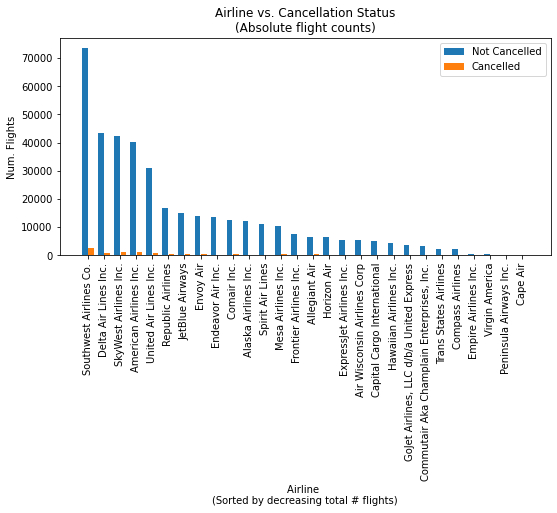

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,Airline,False,True,Total,Prop. Cancelled
0,Peninsula Airways Inc.,32,11,43,0.255814
1,Empire Airlines Inc.,340,22,362,0.060773
2,Allegiant Air,6420,384,6804,0.056437
3,"Commutair Aka Champlain Enterprises, Inc.",3274,161,3435,0.046870
4,Capital Cargo International,5027,230,5257,0.043751
5,Trans States Airlines,2312,98,2410,0.040664
6,ExpressJet Airlines Inc.,5347,226,5573,0.040553
7,Air Wisconsin Airlines Corp,5265,204,5469,0.037301
8,Comair Inc.,12534,483,13017,0.037105
9,Mesa Airlines Inc.,10344,388,10732,0.036154



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,28.000000
mean,0.037462
std,0.044841
min,0.000000
25%,0.020221
50%,0.027180
75%,0.038114
max,0.255814


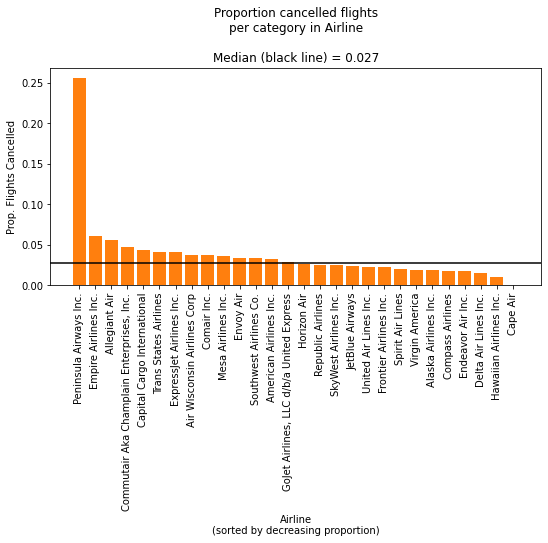




********************************************************************************
OriginStateName
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,OriginStateName,False,True,Total
0,California,41077,1037,42114
1,Texas,40742,1295,42037
2,Florida,30693,873,31566
3,Illinois,24071,863,24934
4,Georgia,20164,374,20538
5,Colorado,17667,523,18190
6,North Carolina,16974,563,17537
7,New York,16775,579,17354
8,Virginia,14042,469,14511
9,Washington,11986,239,12225


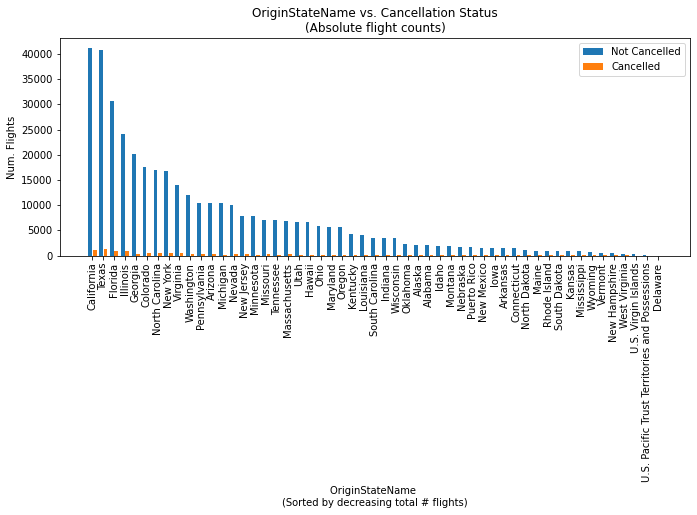

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,OriginStateName,False,True,Total,Prop. Cancelled
0,West Virginia,371,16,387,0.041344
1,New Jersey,7779,312,8091,0.038561
2,South Carolina,3553,142,3695,0.038430
3,Louisiana,4015,158,4173,0.037862
4,Vermont,500,19,519,0.036609
5,South Dakota,870,33,903,0.036545
6,Kansas,867,32,899,0.035595
7,Iowa,1574,57,1631,0.034948
8,Wyoming,637,23,660,0.034848
9,Illinois,24071,863,24934,0.034611



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,53.000000
mean,0.027553
std,0.007826
min,0.000000
25%,0.023402
50%,0.028752
75%,0.032104
max,0.041344


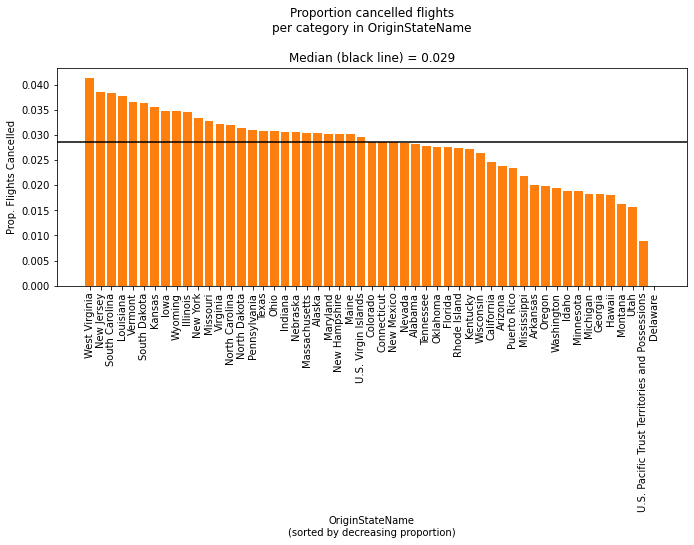




********************************************************************************
OriginCityName
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,OriginCityName,False,True,Total
0,"Chicago, IL",23016,819,23835
1,"Atlanta, GA",18760,334,19094
2,"Denver, CO",15718,435,16153
3,"Dallas/Fort Worth, TX",14515,513,15028
4,"Houston, TX",12790,345,13135
5,"Charlotte, NC",11900,395,12295
6,"New York, NY",11829,407,12236
7,"Los Angeles, CA",11356,229,11585
8,"Washington, DC",10598,336,10934
9,"Seattle, WA",9891,181,10072


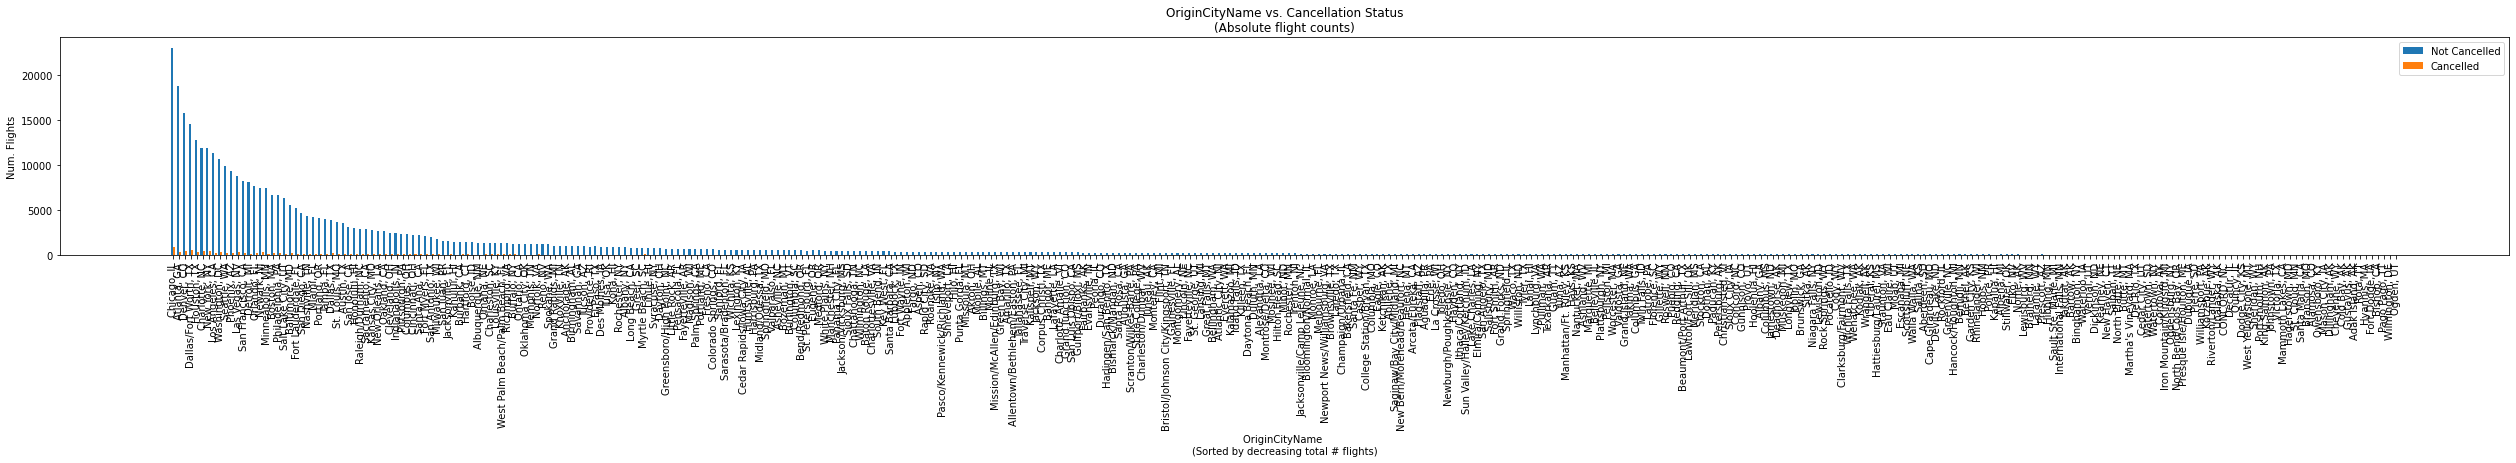

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,OriginCityName,False,True,Total,Prop. Cancelled
0,"Adak Island, AK",4,2,6,0.333333
1,"Unalaska, AK",13,6,19,0.315789
2,"Cold Bay, AK",5,2,7,0.285714
3,"Kapalua, HI",32,7,39,0.179487
4,"Mammoth Lakes, CA",10,2,12,0.166667
5,"Dillingham, AK",6,1,7,0.142857
6,"Owensboro, KY",7,1,8,0.125000
7,"Gunnison, CO",49,7,56,0.125000
8,"Concord, NC",50,7,57,0.122807
9,"Sun Valley/Hailey/Ketchum, ID",93,12,105,0.114286



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,379.000000
mean,0.034553
std,0.035318
min,0.000000
25%,0.019210
50%,0.028369
75%,0.041217
max,0.333333


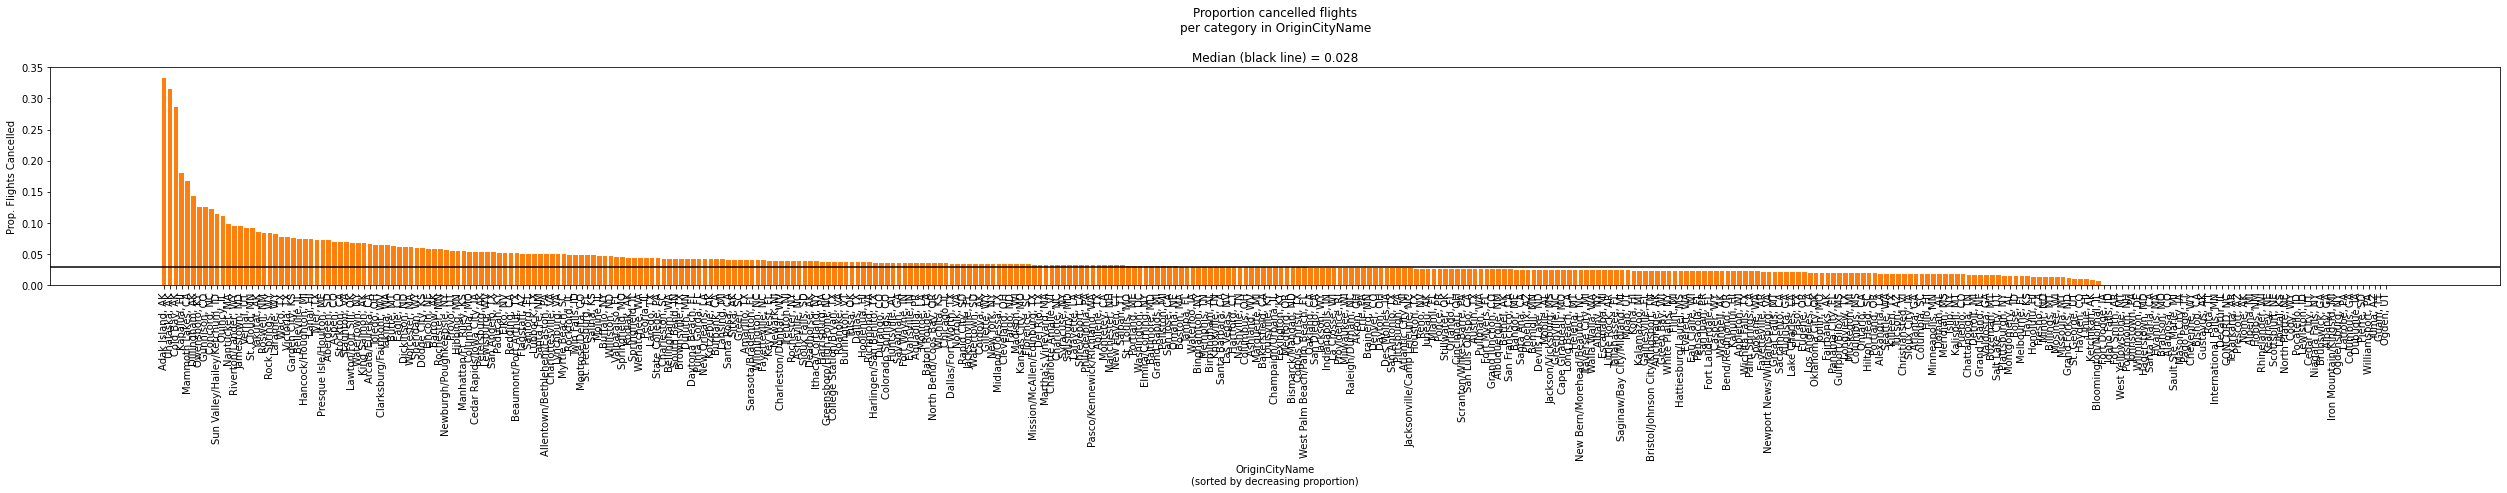




********************************************************************************
DestCityName
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,DestCityName,False,True,Total
0,"Chicago, IL",22821,828,23649
1,"Atlanta, GA",18674,322,18996
2,"Denver, CO",15858,433,16291
3,"Dallas/Fort Worth, TX",14642,543,15185
4,"Houston, TX",12673,369,13042
5,"Charlotte, NC",11988,411,12399
6,"New York, NY",11625,389,12014
7,"Los Angeles, CA",11374,269,11643
8,"Washington, DC",10771,340,11111
9,"Seattle, WA",9875,197,10072


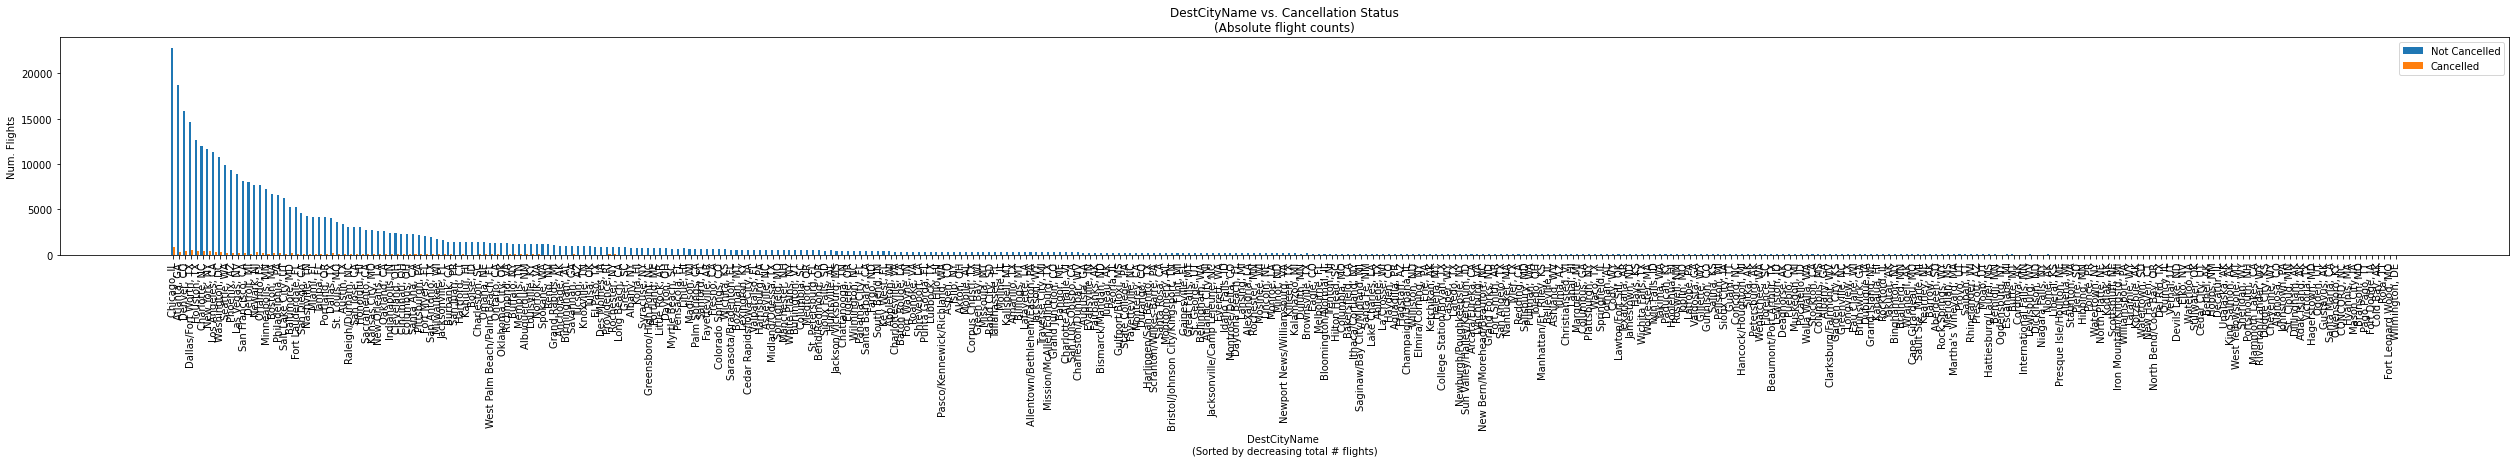

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,DestCityName,False,True,Total,Prop. Cancelled
0,"Cold Bay, AK",2,1,3,0.333333
1,"Adak Island, AK",7,3,10,0.300000
2,"Mammoth Lakes, CA",14,6,20,0.300000
3,"Unalaska, AK",19,5,24,0.208333
4,"Devils Lake, ND",24,4,28,0.142857
5,"Owensboro, KY",6,1,7,0.142857
6,"Gustavus, AK",7,1,8,0.125000
7,"Decatur, IL",21,3,24,0.125000
8,"Santa Maria, CA",7,1,8,0.125000
9,"Ogden, UT",8,1,9,0.111111



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,379.000000
mean,0.033649
std,0.035885
min,0.000000
25%,0.017429
50%,0.027273
75%,0.039651
max,0.333333


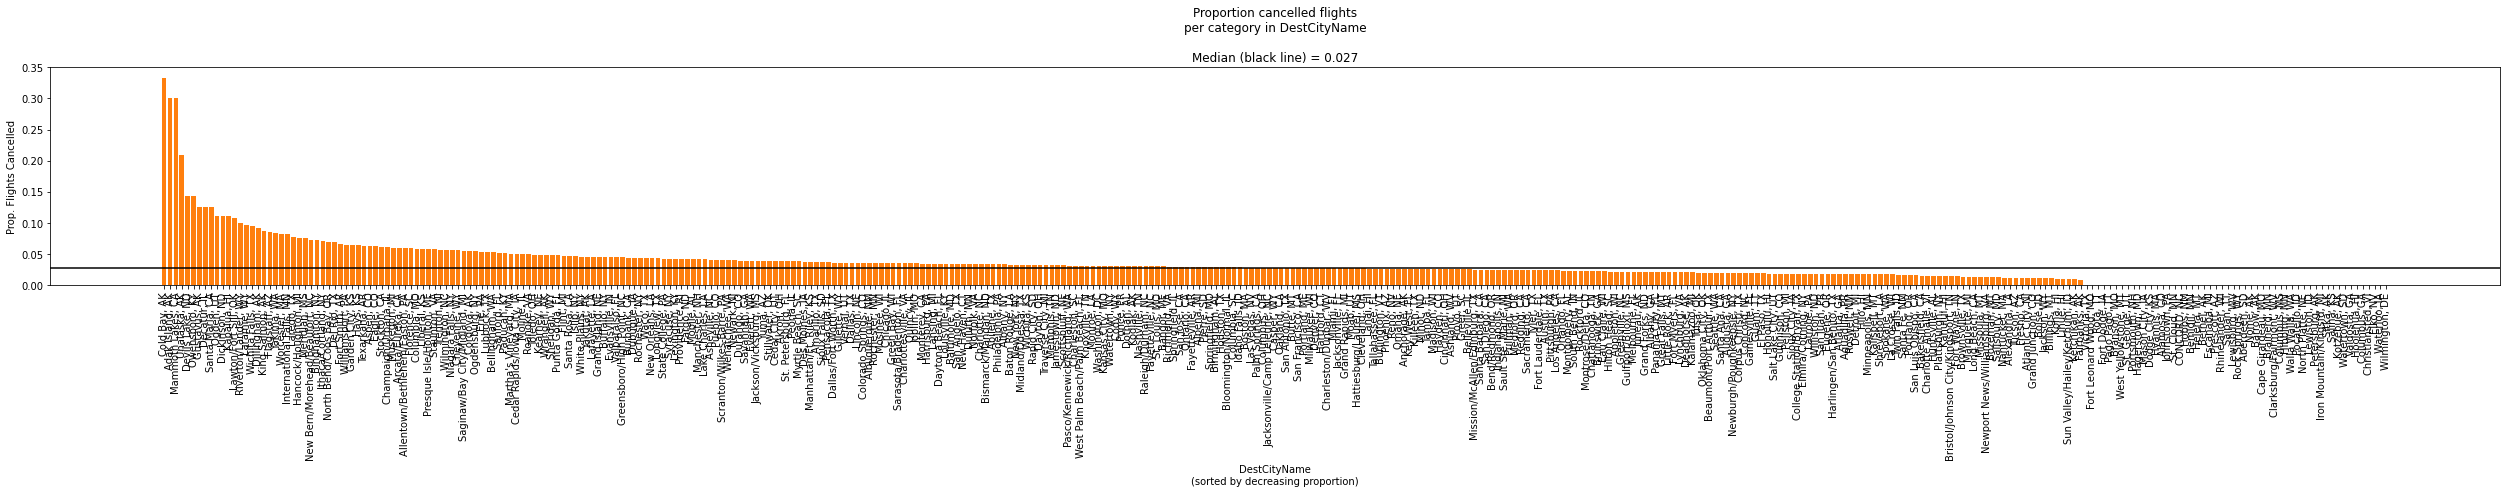




********************************************************************************
DestStateName
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,DestStateName,False,True,Total
0,California,41261,1082,42343
1,Texas,40568,1316,41884
2,Florida,31204,843,32047
3,Illinois,23823,872,24695
4,Georgia,20086,367,20453
5,Colorado,17833,508,18341
6,North Carolina,17308,607,17915
7,New York,16552,603,17155
8,Virginia,14251,457,14708
9,Washington,12044,255,12299


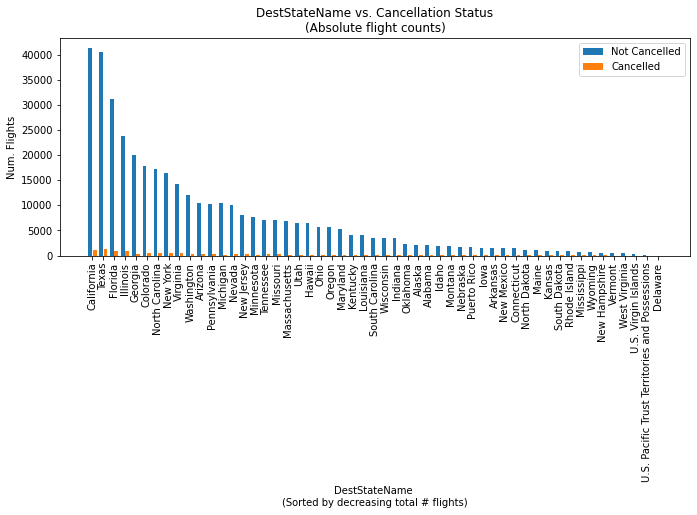

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,DestStateName,False,True,Total,Prop. Cancelled
0,Rhode Island,863,38,901,0.042175
1,Iowa,1555,65,1620,0.040123
2,New Hampshire,506,21,527,0.039848
3,New Jersey,7990,323,8313,0.038855
4,Louisiana,4061,160,4221,0.037906
5,North Dakota,1098,43,1141,0.037686
6,Illinois,23823,872,24695,0.035311
7,New York,16552,603,17155,0.035150
8,Kansas,889,32,921,0.034745
9,North Carolina,17308,607,17915,0.033882



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,53.000000
mean,0.026635
std,0.008557
min,0.000000
25%,0.020979
50%,0.027383
75%,0.032080
max,0.042175


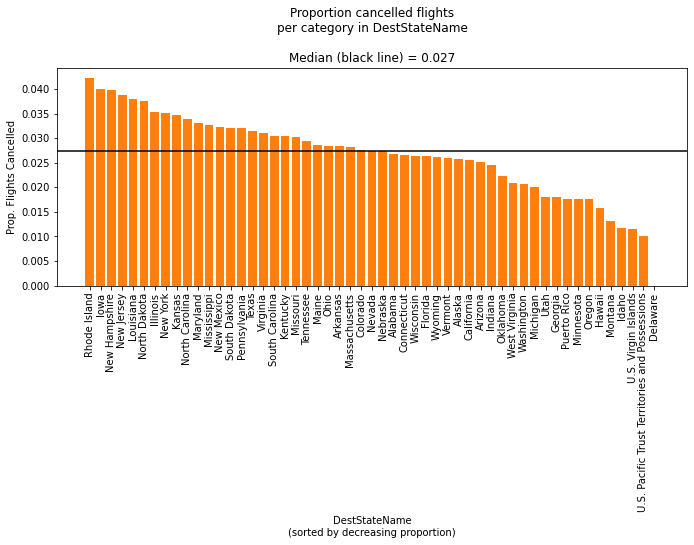




********************************************************************************
Year
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,Year,False,True,Total
0,2018,98460,1540,100000
1,2019,98131,1869,100000
2,2020,94084,5916,100000
3,2021,98198,1802,100000


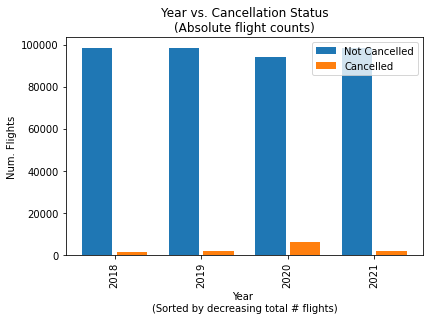

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,Year,False,True,Total,Prop. Cancelled
0,2020,94084,5916,100000,0.05916
1,2019,98131,1869,100000,0.01869
2,2021,98198,1802,100000,0.01802
3,2018,98460,1540,100000,0.01540



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,4.000000
mean,0.027818
std,0.020943
min,0.015400
25%,0.017365
50%,0.018355
75%,0.028807
max,0.059160


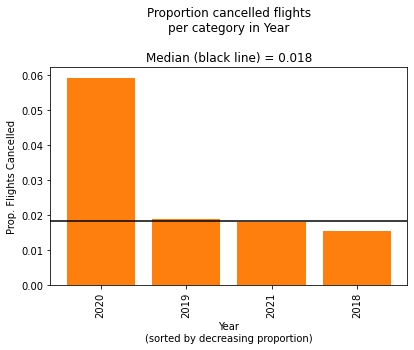




********************************************************************************
Quarter
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,Quarter,False,True,Total
0,4,109452,1255,110707
1,3,101376,1763,103139
2,1,96744,4145,100889
3,2,81301,3964,85265


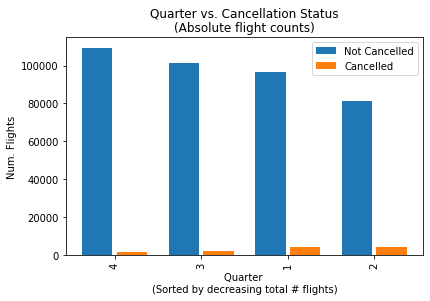

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,Quarter,False,True,Total,Prop. Cancelled
0,2,81301,3964,85265,0.046490
1,1,96744,4145,100889,0.041085
2,3,101376,1763,103139,0.017093
3,4,109452,1255,110707,0.011336



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,4.000000
mean,0.029001
std,0.017376
min,0.011336
25%,0.015654
50%,0.029089
75%,0.042436
max,0.046490


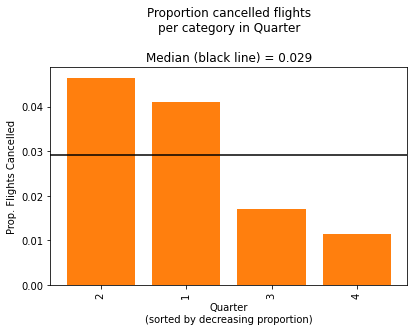




********************************************************************************
Month
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,Month,False,True,Total
0,10,36852,421,37273
1,12,36429,519,36948
2,11,36171,315,36486
3,3,33378,2688,36066
4,8,34641,778,35419
5,1,34474,684,35158
6,9,34618,484,35102
7,7,32117,501,32618
8,4,27754,3020,30774
9,2,28892,773,29665


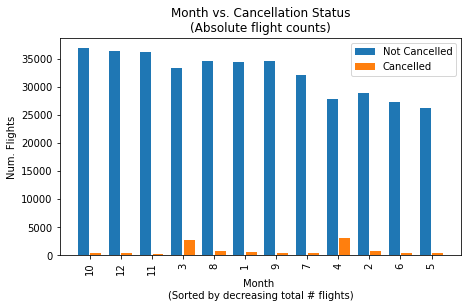

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,Month,False,True,Total,Prop. Cancelled
0,4,27754,3020,30774,0.098135
1,3,33378,2688,36066,0.074530
2,2,28892,773,29665,0.026058
3,8,34641,778,35419,0.021966
4,1,34474,684,35158,0.019455
5,5,26318,495,26813,0.018461
6,6,27229,449,27678,0.016222
7,7,32117,501,32618,0.015360
8,12,36429,519,36948,0.014047
9,9,34618,484,35102,0.013788



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,12.000000
mean,0.028162
std,0.028021
min,0.008633
25%,0.013982
50%,0.017342
75%,0.022989
max,0.098135


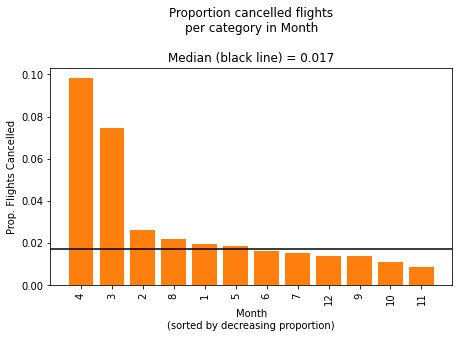




********************************************************************************
DayofMonth
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,DayofMonth,False,True,Total
0,12,13256,255,13511
1,19,13144,320,13464
2,21,13070,373,13443
3,20,13059,326,13385
4,23,12999,341,13340
5,13,13004,312,13316
6,3,12906,356,13262
7,16,12909,317,13226
8,9,12888,299,13187
9,7,12798,367,13165


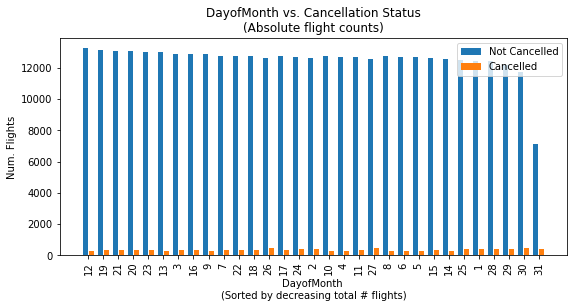

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,DayofMonth,False,True,Total,Prop. Cancelled
0,31,7123,407,7530,0.054050
1,30,11729,492,12221,0.040259
2,26,12612,485,13097,0.037031
3,27,12563,468,13031,0.035914
4,29,12186,436,12622,0.034543
5,1,12439,418,12857,0.032511
6,2,12666,425,13091,0.032465
7,25,12489,393,12882,0.030508
8,28,12462,387,12849,0.030119
9,24,12706,389,13095,0.029706



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,31.000000
mean,0.028234
std,0.006890
min,0.018874
25%,0.023847
50%,0.026844
75%,0.030313
max,0.054050


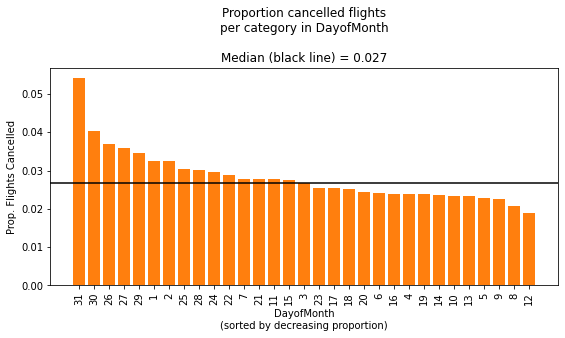




********************************************************************************
DayOfWeek
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,DayOfWeek,False,True,Total
0,1,58115,1763,59878
1,5,57921,1587,59508
2,4,57542,1724,59266
3,7,56465,1637,58102
4,3,55079,1638,56717
5,2,53928,1542,55470
6,6,49823,1236,51059


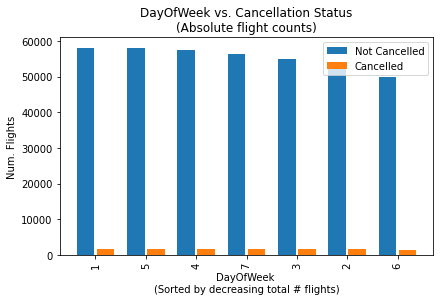

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,DayOfWeek,False,True,Total,Prop. Cancelled
0,1,58115,1763,59878,0.029443
1,4,57542,1724,59266,0.029089
2,3,55079,1638,56717,0.028880
3,7,56465,1637,58102,0.028175
4,2,53928,1542,55470,0.027799
5,5,57921,1587,59508,0.026669
6,6,49823,1236,51059,0.024207



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,7.000000
mean,0.027752
std,0.001818
min,0.024207
25%,0.027234
50%,0.028175
75%,0.028985
max,0.029443


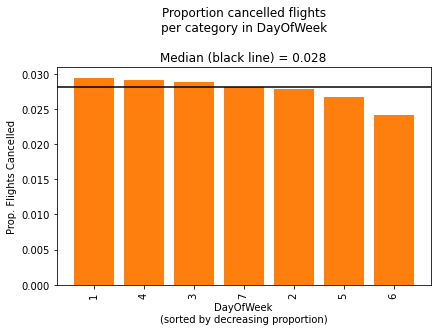




********************************************************************************
Marketing_Airline_Network
********************************************************************************

===> Top 10 based on total number of flights


Cancelled,Marketing_Airline_Network,False,True,Total
0,AA,90596,3172,93768
1,UA,79576,2424,82000
2,DL,78180,1272,79452
3,WN,73465,2559,76024
4,AS,22018,471,22489
5,B6,14852,362,15214
6,NK,11139,233,11372
7,F9,7656,175,7831
8,G4,6420,384,6804
9,HA,4668,69,4737


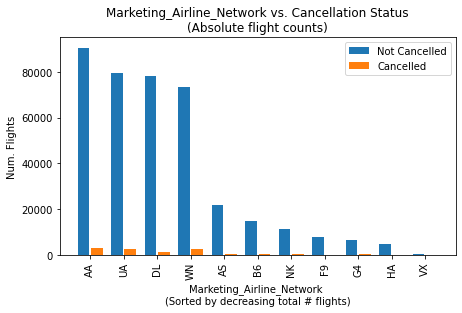

------------------------------------------------------------------------------------------

===> Top 10 based on proportion cancelled flights


Cancelled,Marketing_Airline_Network,False,True,Total,Prop. Cancelled
0,G4,6420,384,6804,0.056437
1,AA,90596,3172,93768,0.033828
2,WN,73465,2559,76024,0.033660
3,UA,79576,2424,82000,0.029561
4,B6,14852,362,15214,0.023794
5,F9,7656,175,7831,0.022347
6,AS,22018,471,22489,0.020944
7,NK,11139,233,11372,0.020489
8,VX,303,6,309,0.019417
9,DL,78180,1272,79452,0.016010



===> Summary statstics of proportion cancelled flights


Cancelled,Prop. Cancelled
count,11.000000
mean,0.026459
std,0.011852
min,0.014566
25%,0.019953
50%,0.022347
75%,0.031611
max,0.056437


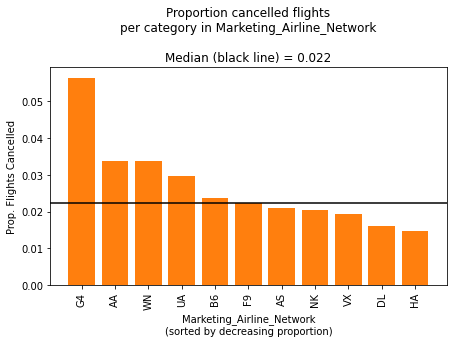

In [19]:
for cat in categories:
    
    print("\n\n\n" + "*" * 80)
    print(cat)
    print("*" * 80)
    
    # make sure column is a string
    # some categorical variables, like year or day of week, are entered as numbers, but are continuous variables
    merged[cat] = merged[cat].astype("str")
    
    # obtain absolute counts of cancelled (True) and not cancelled (False) flights across categories within variable
    # sort by high to low total flights within categories
    counts = pd.crosstab(merged[cat], merged["Cancelled"]).reset_index()
    counts["Total"] = counts[True] + counts[False]
    counts = counts.sort_values("Total", ascending = False)
    print("\n===> Top 10 based on total number of flights")
    display(counts.head(10).reset_index(drop = True))
    
    # plot absolute counts as a grouped barplot
    width_of_bar = 0.35
    x = np.arange(counts.shape[0])
    plt.figure(figsize = (6 + (0.1 * counts.shape[0]), 4))
    plt.bar(x-0.2, counts[False], width_of_bar)
    plt.bar(x+0.2, counts[True], width_of_bar)
    plt.xticks(x, counts[cat])
    plt.ylabel("Num. Flights")
    plt.legend(["Not Cancelled", "Cancelled"])
    plt.title(cat + " vs. Cancellation Status\n(Absolute flight counts)")
    plt.xlabel(cat + " \n(Sorted by decreasing total # flights)")
    plt.xticks(rotation = 90)
    plt.show()
    print("-" * 90)
    
    # calculate proportion of cancelled flights within categories of variable
    # sort by decreasing proportion
    counts["Prop. Cancelled"] = counts[True] / counts["Total"]
    counts = counts.sort_values("Prop. Cancelled", ascending = False)
    med = counts["Prop. Cancelled"].median()
    print("\n===> Top 10 based on proportion cancelled flights")
    display(counts.head(10).reset_index(drop = True))
    print("\n===> Summary statstics of proportion cancelled flights")
    display(counts[["Prop. Cancelled"]].describe())
    
    # plot proportion flights cancelled
    plt.figure(figsize = (6 + (0.1 * counts.shape[0]), 4))
    plt.bar(x = counts[cat], height = counts["Prop. Cancelled"], color ="#ff7f0e")
    plt.ylabel("Prop. Flights Cancelled")
    plt.title("Proportion cancelled flights\nper category in " + cat + "\n\nMedian (black line) = " + str(round(med,3)))
    plt.axhline(med, c = "black")
    plt.xlabel(cat + "\n(sorted by decreasing proportion)")
    plt.xticks(rotation = 90)
    plt.show()

## 3.2) Explore relationship between flight cancellation status and continous variables

In this section, I seek to explore the relationship between continous variables (ie. distance) and whether or not a flight is cancelled. I will use two types of visualzations. (1) Histograms to visualize the distribution of values for cancelled and not cancelled flights, and (2) Boxplots to visualize the distribution and summary statistics between cancelled and not.

| Categorical Variable | Description | Notes |
| -------------------- | ----------- | ------|
| CRSDepTime | Scheduled departure time (local time, hhmm, 24h clock) | |
| DepDelay | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.| | 
| DepDelayMinutes | Difference in minutes between scheduled and actual departure time. Early departures set to 0. |  |
| TaxiOut | Taxi Out Time, in Minutes | | 
| Distance | Distance between origin and destinaton ariports in miles | |

I noticed a lot of extreme outliers that make distrubution hard to interpret - further data cleaning is required and perhaps removing these outliers would improve interpretability of variables

In [11]:
# Define continuous variables (columns) of interest
continuous = ["CRSDepTime", 
              "DepTime",
              "DepDelay", 
              "DepDelayMinutes", 
              "TaxiOut",
              "Distance"      
             ]

In [12]:
print("====> Summary statistics across continuous values of interest, split by cancelled (True) or not cancelled (False)....\n")
display(merged[["Cancelled"] + continuous].groupby('Cancelled').describe().T)

====> Summary statistics across continuous values of interest, split by cancelled (True) or not cancelled (False)....



Cancelled                      False         True 
CRSDepTime      count  388873.000000  11127.000000
                mean     1325.564832   1360.904467
                std       479.204678    486.384805
                min         1.000000     17.000000
                25%       920.000000    940.000000
                50%      1318.000000   1400.000000
                75%      1728.000000   1752.500000
                max      2359.000000   2359.000000
DepTime         count  388872.000000    176.000000
                mean     1328.816932   1549.943182
                std       491.125897    496.709041
                min         1.000000      7.000000
                25%       921.000000   1242.750000
                50%      1323.000000   1603.000000
                75%      1734.000000   1918.750000
                max      2400.000000   2356.000000
DepDelay        count  388854.000000    168.000000
                mean        8.180140     58.815476
                std        45.386284     85.186561
                min      -191.000000    -17.000000
                25%        -6.000000     -2.000000
                50%        -3.000000     18.000000
                75%         4.000000     95.750000
                max      3072.000000    452.000000
DepDelayMinutes count  388854.000000    168.000000
                mean       11.834881     60.333333
                std        44.251587     84.041098
                min         0.000000      0.000000
                25%         0.000000      0.000000
                50%         0.000000     18.000000
                75%         4.000000     95.750000
                max      3072.000000    452.000000
TaxiOut         count  388762.000000     40.000000
                mean       16.540138     18.200000
                std         9.251881      9.129271
                min         0.000000      3.000000
                25%        11.000000     12.000000
                50%        14.000000     17.500000
                75%        19.000000     22.250000
                max       172.000000     49.000000
Distance        count  388873.000000  11127.000000
                mean      778.987597    706.749708
                std       580.996638    523.258112
                min        27.000000     16.000000
                25%       354.000000    322.000000
                50%       625.000000    583.000000
                75%      1013.000000    948.000000
                max      5812.000000   4983.000000




********************************************************************************
CRSDepTime
********************************************************************************


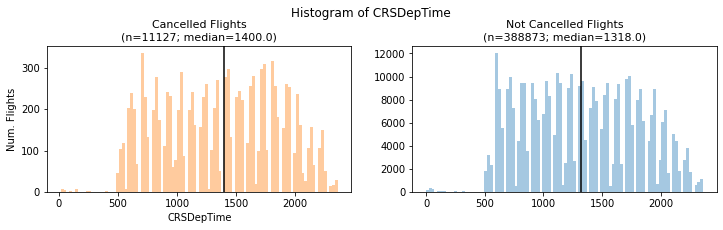

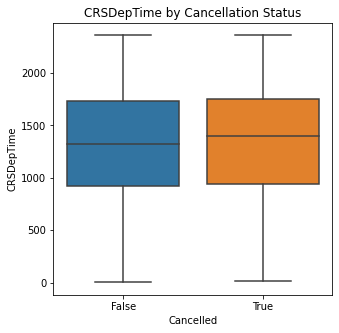




********************************************************************************
DepTime
********************************************************************************


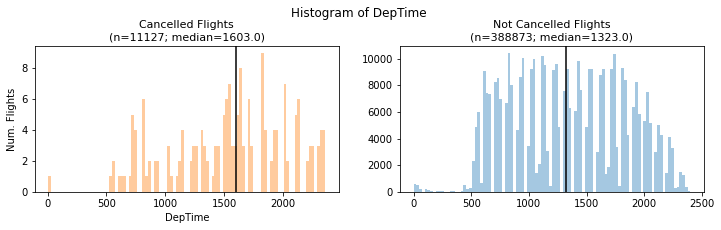

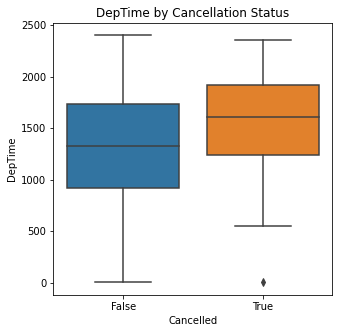




********************************************************************************
DepDelay
********************************************************************************


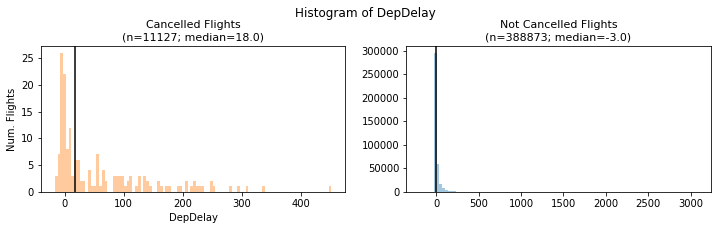

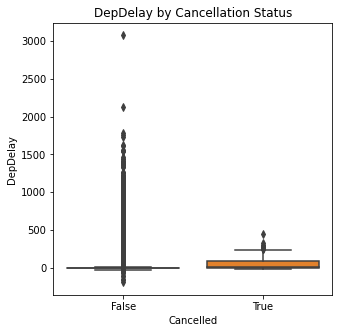




********************************************************************************
DepDelayMinutes
********************************************************************************


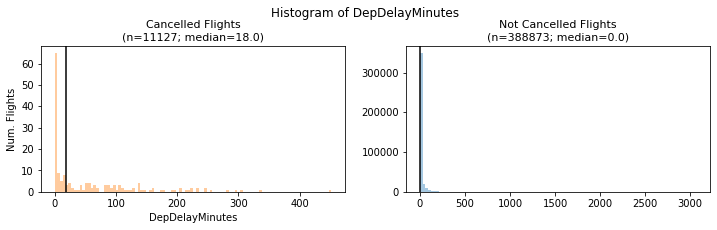

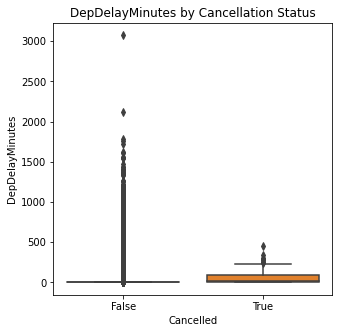




********************************************************************************
TaxiOut
********************************************************************************


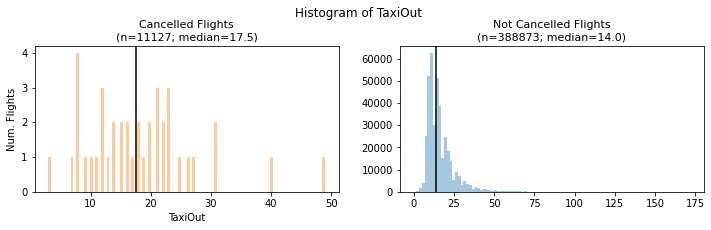

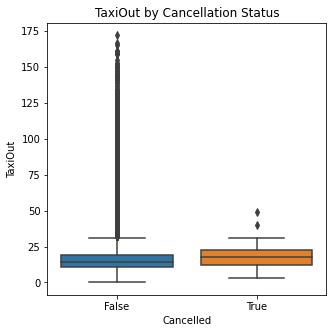




********************************************************************************
Distance
********************************************************************************


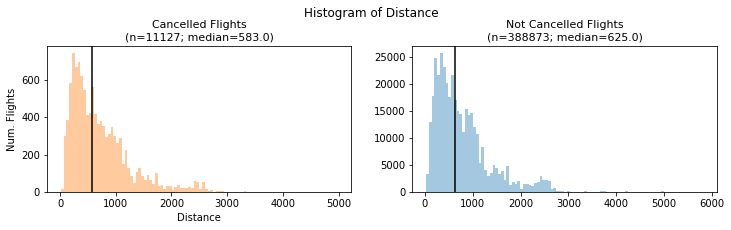

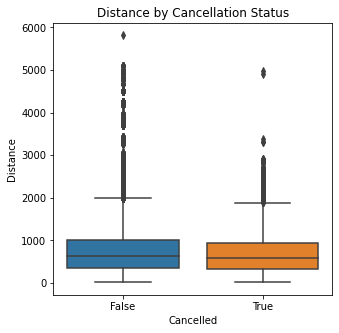

In [13]:
for cont in continuous:
    
    print("\n\n\n" + "*" * 80)
    print(cont)
    print("*" * 80)
    
    # plot histogram of continuous value distributions in cancelled and not cancelled flights
    fig,(ax1, ax2) = plt.subplots(1, 2, figsize = [12,3])
    fig.suptitle('Histogram of ' + cont)
    fig.subplots_adjust(top=0.8)
    ax1.hist(merged[merged["Cancelled"] == True][cont], bins = 100, alpha = 0.4, color = "#ff7f0e")
    ax1.set_title('Cancelled Flights\n(n=' + str(merged[merged["Cancelled"] == True].shape[0]) + "; median=" + 
                  str(round(merged[merged["Cancelled"] == True][cont].median(), 3)) + ")", fontsize = 11)
    ax1.axvline(merged[merged["Cancelled"] == True][cont].median(), color = "black")
    ax1.set_ylabel("Num. Flights")
    ax1.set_xlabel(cont)
    ax2.hist(merged[merged["Cancelled"] == False][cont], bins = 100, alpha = 0.4, color = "#1f77b4")
    ax2.set_title('Not Cancelled Flights\n(n=' + str(merged[merged["Cancelled"] == False].shape[0]) + "; median=" + 
                  str(round(merged[merged["Cancelled"] == False][cont].median(), 3)) + ")", fontsize = 11)
    ax2.axvline(merged[merged["Cancelled"] == False][cont].median(), color = "black")
    ax1.set_ylabel("Num. Flights")
    ax1.set_xlabel(cont)
    plt.show()
    
    # visualize distribution differences (if any) between cancelled and non-cancelled flights using a boxplot
    plt.figure(figsize=(5,5))
    sns.boxplot(data=merged, x="Cancelled", y=cont)
    plt.title(cont + " by Cancellation Status")
    plt.show()

In [23]:
# take a look at the column headers
merged.columns.to_list()

['FlightDate',
 'Airline',
 'Origin',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRS